<a href="https://colab.research.google.com/github/RohanKaushikan/CancerBioinformatics/blob/main/CombinedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [79]:
file_path = '/content/multi_combined_subset.csv'
data = pd.read_csv(file_path)
print(data.shape)

(79318, 8)


In [80]:
print(data['Disease Free Status'])

0        0
1        0
2        0
3        0
4        0
        ..
79313    0
79314    0
79315    0
79316    0
79317    0
Name: Disease Free Status, Length: 79318, dtype: int64


In [81]:
print(data['Hugo_Symbol'])

0           BTRC
1          NFKB2
2          DHX32
3          FOXI2
4           NMT2
          ...   
79313     ALPPL2
79314      ASAP2
79315       ECE2
79316      KCNH8
79317    CCDC71L
Name: Hugo_Symbol, Length: 79318, dtype: object


In [82]:
label_encoder = LabelEncoder()
data['Hugo_Symbol'] = label_encoder.fit_transform(data['Hugo_Symbol'])
print(data['Hugo_Symbol'])

0        1547
1        9566
2        3869
3        5295
4        9677
         ... 
79313     577
79314    1021
79315    4245
79316    7260
79317    2315
Name: Hugo_Symbol, Length: 79318, dtype: int64


In [83]:
X = data[['Hugo_Symbol']]
y = data['Disease Free Status']
print(X.shape)
print(y.shape)

(79318, 1)
(79318,)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
print(y_train)


52100    0
58438    0
11746    0
5662     1
15644    0
        ..
6265     0
54886    1
76820    0
860      0
15795    0
Name: Disease Free Status, Length: 63454, dtype: int64


In [86]:
print(X_train)
print(X_train.shape)

       Hugo_Symbol
52100        17219
58438         8083
11746         1664
5662          7440
15644        14796
...            ...
6265          3873
54886        13053
76820        13278
860           7648
15795        11278

[63454 rows x 1 columns]
(63454, 1)


In [87]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [88]:
y_pred = model.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.93


In [90]:
confusion_matrix(y_test, y_pred)

array([[14779,     0],
       [ 1085,     0]])

In [91]:
# Step 7: Optionally, print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     14779
           1       0.00      0.00      0.00      1085

    accuracy                           0.93     15864
   macro avg       0.47      0.50      0.48     15864
weighted avg       0.87      0.93      0.90     15864



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


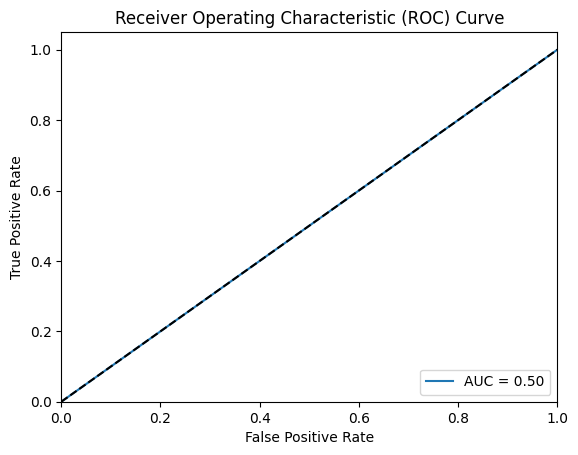

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_true and y_pred_prob are your true labels and predicted probabilities, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Using HistGradientBoostingClassifier

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [94]:
data = pd.read_csv('/content/multi_combined_subset.csv')

In [95]:
unique_values = data['Disease Free Status'].unique()
print(unique_values)

[0 1]


In [96]:
label_encoder = LabelEncoder()
data['Hugo_Symbol'] = label_encoder.fit_transform(data['Hugo_Symbol'])
print(data['Hugo_Symbol'])

0        1547
1        9566
2        3869
3        5295
4        9677
         ... 
79313     577
79314    1021
79315    4245
79316    7260
79317    2315
Name: Hugo_Symbol, Length: 79318, dtype: int64


In [97]:
X = data[['Hugo_Symbol']]
y = data['Disease Free Status']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [100]:
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 93.16%


In [101]:
data['Disease Free Status'].value_counts()

0    73882
1     5436
Name: Disease Free Status, dtype: int64

# Trying With More PatientData and Multi Regression

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt

In [171]:
!pip install XGBoost

In [107]:
!pip install seaborn

In [108]:
data = pd.read_csv('multi_combined_subset.csv')

In [109]:
import pandas as pd


# Assume `df` is your DataFrame and it has a 'class' column that contains the class labels
# 1. Separate the different classes
df_class_0 = data[data['Disease Free Status'] == 0]
df_class_1 = data[data['Disease Free Status'] == 1]


# Count the number of samples in each class
count_class_0 = len(df_class_0)
count_class_1 = len(df_class_1)


# Downsample the majority class (assume class 0 is the majority here)
df_class_0_downsampled = df_class_0.sample(2*count_class_1)


# Combine the downsampled majority class DataFrame with the minority class DataFrame
df_downsampled = pd.concat([df_class_0_downsampled, df_class_1], axis=0)


# Shuffle the dataset
df_downsampled = df_downsampled.sample(frac=1).reset_index(drop=True)


# Now `df_downsampled` is the downsampled dataset

In [149]:
X = df_downsampled.drop('Disease Free Status', axis=1)
y = df_downsampled['Disease Free Status']

In [150]:
from collections import Counter
print(len(df_downsampled['Hugo_Symbol']))
print(len(Counter(df_downsampled['Hugo_Symbol'])))

16308
9314


In [151]:
categorical_features = ['Consequence', 'Variant_Classification', 'Cancer Stage', 'Race']
#categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
x_encoded = pd.get_dummies(X, columns = categorical_features, drop_first = True)
x_encoded.head()

,Hugo_Symbol,Diagnosis Age,Mutation Count,Consequence_5_prime_UTR_variant,Consequence_coding_sequence_variant,Consequence_downstream_gene_variant,Consequence_frameshift_variant,Consequence_inframe_deletion,Consequence_inframe_insertion,Consequence_intron_variant,...,Cancer Stage_STAGE II,Cancer Stage_STAGE IIA,Cancer Stage_STAGE IIB,Cancer Stage_STAGE IIIA,Cancer Stage_STAGE IIIB,Cancer Stage_STAGE IIIC,Cancer Stage_STAGE X,Race_Asian,Race_Black or African American,Race_White
0,PCM1,73,98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,GOLGA1,62,52,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,SLC4A3,44,29,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,ARHGAP24,60,785,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,SPATA31E1,77,689,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [152]:
label_encoder = LabelEncoder()
x_encoded['Hugo_Symbol'] = label_encoder.fit_transform(x_encoded['Hugo_Symbol'])
x_encoded.head()

,Hugo_Symbol,Diagnosis Age,Mutation Count,Consequence_5_prime_UTR_variant,Consequence_coding_sequence_variant,Consequence_downstream_gene_variant,Consequence_frameshift_variant,Consequence_inframe_deletion,Consequence_inframe_insertion,Consequence_intron_variant,...,Cancer Stage_STAGE II,Cancer Stage_STAGE IIA,Cancer Stage_STAGE IIB,Cancer Stage_STAGE IIIA,Cancer Stage_STAGE IIIB,Cancer Stage_STAGE IIIC,Cancer Stage_STAGE X,Race_Asian,Race_Black or African American,Race_White
0,5767,73,98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3114,62,52,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,7334,44,29,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,490,60,785,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,7557,77,689,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [154]:
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42, stratify = y)

In [155]:
numeric_features = ['Diagnosis Age', 'Mutation Count']
#numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the desired columns in the DataFrame
scaler.fit(X_train[['Diagnosis Age', 'Mutation Count']])

# Now transform the columns
X_train[['Diagnosis Age', 'Mutation Count']] = scaler.transform(X_train[['Diagnosis Age', 'Mutation Count']])
X_test[['Diagnosis Age', 'Mutation Count']] = scaler.transform(X_test[['Diagnosis Age', 'Mutation Count']])

In [161]:
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numeric_transformer, numeric_features),
#        ('cat', categorical_transformer, categorical_features)])

In [173]:
import xgboost as xgb

In [176]:
from sklearn.utils import class_weight
#model = LogisticRegression(class_weight = 'balanced')
model = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 100)

In [177]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [178]:
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

In [53]:
#y_pred = model.predict(X_test)

In [179]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [180]:
confusion_matrix(y_test, y_pred)

array([[2156,   19],
       [  19, 1068]])

In [181]:
import seaborn as sns

In [182]:
import numpy as np

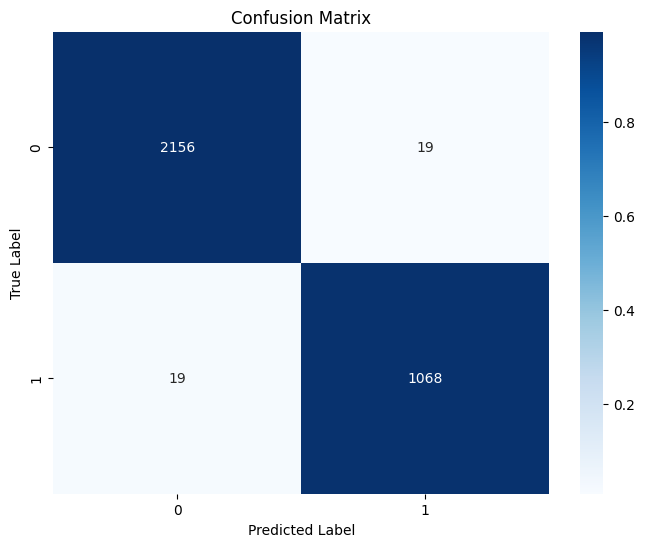

In [183]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(8, 6))
class_names = ['0', '1']
sns.heatmap(cm_normalized, annot=cm, fmt='g', cmap='Blues',
xticklabels=class_names,
yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [184]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc:.2f}')

ROC AUC: 1.00


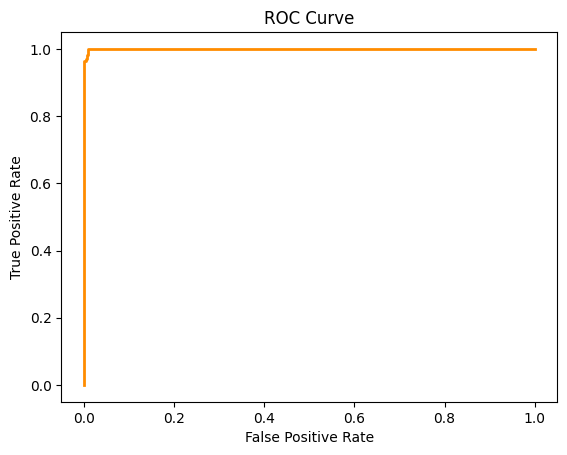

In [185]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

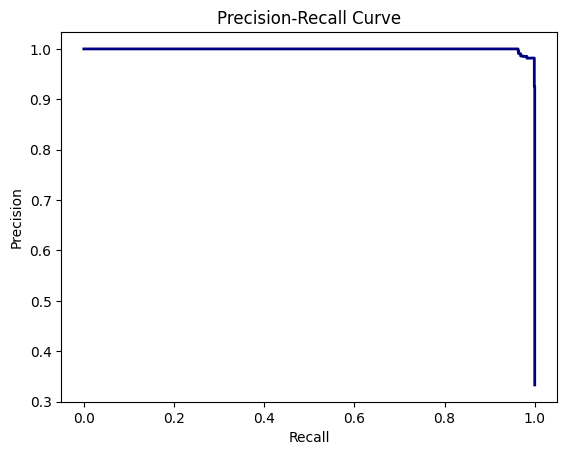

In [186]:
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(recall, precision, color='navy', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [187]:
# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2175
           1       0.98      0.98      0.98      1087

    accuracy                           0.99      3262
   macro avg       0.99      0.99      0.99      3262
weighted avg       0.99      0.99      0.99      3262



# Feature Importance Analysis - Top Genetic Mutations

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [65]:
# Load the data (replace 'your_data.csv' with your dataset)
data = pd.read_csv('multi_combined_subset.csv')

In [66]:
# Split data into features (X) and target (y)
X = data.drop('Disease Free Status', axis=1)
y = data['Disease Free Status']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [68]:
categorical_features = ['Hugo_Symbol', 'Consequence', 'Variant_Classification', 'Cancer Stage', 'Race']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [69]:
numeric_features = ['Diagnosis Age', 'Mutation Count']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [70]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [71]:
# Define the logistic regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

In [72]:
# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Diagnosis Age',
                                                   'Mutation Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Hugo_Symbol', 'Consequence',
                                                   'Variant_Classification',
                                                   'Cancer Stage', 'Race'])])),
                ('classifier', LogisticRegression())])

In [73]:
# Get feature names after one-hot encoding
categorical_encoder = (model.named_steps['preprocessor']
                        .named_transformers_['cat']
                        .named_steps['onehot'])

In [74]:
y_pred = model.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score, classification_report

In [76]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94
